In [153]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
if os.name =='nt':
    font_family ="Malgun Gothic"
else:
    font_family="AppleGothic"
    
sns.set(font=font_family, rc ={"axes.unicode_minus": False})

In [154]:
#부산 음향신호기와 서울 음향신호기 차이 PCA

df=pd.read_csv('부산데이터셋.csv', encoding='euckr')
df

,index_부산 보행등,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,...,버스정류소1,복지관1,시각장애인협회1,안마원1,주민센터1,지하철역1,터미널1,편의점1,약국1,병원1
0,1,2417.879656,12705.060760,141.605483,1037.862825,12413.490090,1701.868620,1022.863654,314.344945,4231.693661,...,80,0,0,0,1,6,0,4,6,10
1,2,2435.553629,12720.660220,126.183552,1051.315521,12433.327920,1713.321603,1042.188031,306.005236,4246.960340,...,81,0,0,0,1,6,0,4,6,9
2,3,6444.897700,14024.588570,75.101932,1137.888200,9737.092056,777.585976,211.149550,499.571548,1680.802262,...,45,0,0,1,1,14,0,26,13,66
3,4,6458.035113,14035.173160,68.832494,1127.685462,9741.790396,787.771837,199.002832,490.075206,1673.688035,...,44,0,0,1,1,14,0,26,13,64
4,5,5933.995947,16237.446680,36.608591,39.897317,15465.223390,186.414343,383.085229,355.408493,7248.261659,...,49,5,0,3,3,8,0,19,20,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,9050,13164.708470,9764.163274,59.501073,1150.794805,2943.170470,631.621888,284.405242,250.403414,711.740290,...,96,0,0,4,7,31,1,51,33,143
9050,9051,13136.090140,9782.988604,82.203006,1146.496242,2923.297271,629.519271,310.892781,301.131537,685.109598,...,95,0,0,4,7,29,1,50,35,145
9051,9052,13123.891020,9764.341811,65.867680,1129.115339,2908.745138,611.774408,292.922164,302.739372,672.012179,...,96,0,0,4,7,29,1,50,33,142
9052,9053,13335.198000,9818.774662,59.812683,1087.443708,3100.839539,765.410954,371.050538,77.510091,884.281205,...,109,0,0,4,8,33,1,52,41,173


In [155]:
df.columns

Index(['index_부산 보행등', '교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터',
       '지하철', '터미널', '편의점', '약국', '병원', '관할구별 시각장애인 수', '교통사고', 'label',
       'smart_label', '교육시설50', '도서관50', '버스정류소50', '복지관50', '시각장애인협회50',
       '안마원50', '주민센터50', '지하철역50', '터미널50', '편의점50', '약국50', '병원50', '교육시설1',
       '도서관1', '버스정류소1', '복지관1', '시각장애인협회1', '안마원1', '주민센터1', '지하철역1', '터미널1',
       '편의점1', '약국1', '병원1'],
      dtype='object')

In [156]:
df['label'] = np.where(df['label'] - df['smart_label'] == 1, 1, 0)

print(df['label'].value_counts())
print(df['smart_label'].value_counts())

0    8269
1     785
Name: label, dtype: int64
0    5666
1    3388
Name: smart_label, dtype: int64


In [157]:
data=df[['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터', '지하철', '터미널', '편의점', '약국', '병원', '관할구별 시각장애인 수', '교통사고','label']]
data

,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,편의점,약국,병원,관할구별 시각장애인 수,교통사고,label
0,2417.879656,12705.060760,141.605483,1037.862825,12413.490090,1701.868620,1022.863654,314.344945,4231.693661,145.445152,814.169768,557.720095,1724,1545.863020,0
1,2435.553629,12720.660220,126.183552,1051.315521,12433.327920,1713.321603,1042.188031,306.005236,4246.960340,133.241979,811.377867,575.154499,1724,1555.731418,0
2,6444.897700,14024.588570,75.101932,1137.888200,9737.092056,777.585976,211.149550,499.571548,1680.802262,285.997005,19.001587,19.001587,1724,1361.592495,0
3,6458.035113,14035.173160,68.832494,1127.685462,9741.790396,787.771837,199.002832,490.075206,1673.688035,274.359834,31.584851,31.584851,1724,1366.345853,0
4,5933.995947,16237.446680,36.608591,39.897317,15465.223390,186.414343,383.085229,355.408493,7248.261659,150.637497,50.977776,39.082138,1724,4984.017495,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,13164.708470,9764.163274,59.501073,1150.794805,2943.170470,631.621888,284.405242,250.403414,711.740290,85.875810,88.657403,68.252058,312,520.564840,1
9050,13136.090140,9782.988604,82.203006,1146.496242,2923.297271,629.519271,310.892781,301.131537,685.109598,115.136919,118.531701,77.334476,312,574.425703,1
9051,13123.891020,9764.341811,65.867680,1129.115339,2908.745138,611.774408,292.922164,302.739372,672.012179,124.810210,128.102822,59.278163,312,572.887644,1
9052,13335.198000,9818.774662,59.812683,1087.443708,3100.839539,765.410954,371.050538,77.510091,884.281205,38.117834,47.473434,47.473434,312,358.118622,0


In [158]:
scaler=['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터','지하철', '터미널', '편의점', '약국', '병원','교통사고']
df[scaler] = np.log(df[scaler])
df

,index_부산 보행등,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,...,버스정류소1,복지관1,시각장애인협회1,안마원1,주민센터1,지하철역1,터미널1,편의점1,약국1,병원1
0,1,7.790646,9.449756,4.953045,6.944919,9.426539,7.439482,6.930361,5.750491,8.350358,...,80,0,0,0,1,6,0,4,6,10
1,2,7.797929,9.450983,4.837738,6.957798,9.428136,7.446189,6.949078,5.723602,8.353959,...,81,0,0,0,1,6,0,4,6,9
2,3,8.771044,9.548567,4.318846,7.036929,9.183698,6.656194,5.352567,6.213751,7.427026,...,45,0,0,1,1,14,0,26,13,66
3,4,8.773080,9.549322,4.231676,7.027923,9.184180,6.669209,5.293319,6.194559,7.422785,...,44,0,0,1,1,14,0,26,13,64
4,5,8.688453,9.695075,3.600283,3.686309,9.646349,5.227972,5.948257,5.873268,8.888517,...,49,5,0,3,3,8,0,19,20,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,9050,9.485295,9.186474,4.085994,7.048208,7.987243,6.448291,5.650400,5.523073,6.567713,...,96,0,0,4,7,31,1,51,33,143
9050,9051,9.483119,9.188400,4.409192,7.044466,7.980467,6.444956,5.739448,5.707547,6.529579,...,95,0,0,4,7,29,1,50,35,145
9051,9052,9.482190,9.186492,4.187648,7.029190,7.975477,6.416364,5.679907,5.712872,6.510276,...,96,0,0,4,7,29,1,50,33,142
9052,9053,9.498162,9.192052,4.091218,6.991585,8.039428,6.640413,5.916338,4.350408,6.784775,...,109,0,0,4,8,33,1,52,41,173


In [159]:
from sklearn.preprocessing import StandardScaler

scaler=['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터', '지하철', '터미널', '편의점', '약국', '병원','관할구별 시각장애인 수','교통사고']
rbs = StandardScaler()
data[scaler]=rbs.fit_transform(data[scaler])

C:\Users\user\AppData\Local\Temp\ipykernel_2492\1312970872.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[scaler]=rbs.fit_transform(data[scaler])


In [160]:
data

,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,편의점,약국,병원,관할구별 시각장애인 수,교통사고,label
0,-1.251930,0.208988,0.599763,-0.198589,0.236305,-0.024433,-0.047059,-0.641740,-0.294795,-0.323127,0.344451,0.220637,1.141689,-0.386926,0
1,-1.249414,0.211714,0.439864,-0.189248,0.239398,-0.019418,-0.033275,-0.643982,-0.291049,-0.357081,0.341119,0.246756,1.141689,-0.384114,0
2,-0.678638,0.439629,-0.089768,-0.129135,-0.180953,-0.429145,-0.626076,-0.591948,-0.920686,0.067949,-0.604319,-0.586428,1.141689,-0.439428,0
3,-0.676768,0.441479,-0.154771,-0.136219,-0.180220,-0.424685,-0.634741,-0.594501,-0.922432,0.035570,-0.589305,-0.567576,1.141689,-0.438074,0
4,-0.751371,0.826417,-0.488879,-0.891535,0.712079,-0.687999,-0.503430,-0.630702,0.445356,-0.308680,-0.566166,-0.556345,1.141689,0.592676,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,0.278004,-0.305054,-0.251522,-0.120173,-1.240145,-0.493058,-0.573821,-0.658929,-1.158457,-0.488875,-0.521208,-0.512645,-1.805972,-0.679055,1
9050,0.273929,-0.301764,-0.016141,-0.123158,-1.243243,-0.493978,-0.554927,-0.645292,-1.164991,-0.407458,-0.485563,-0.499038,-1.805972,-0.663708,1
9051,0.272193,-0.305023,-0.185511,-0.135227,-1.245512,-0.501748,-0.567746,-0.644860,-1.168205,-0.380542,-0.474143,-0.526088,-1.805972,-0.664147,1
9052,0.302275,-0.295509,-0.248292,-0.164162,-1.215564,-0.434476,-0.512015,-0.705406,-1.116122,-0.621758,-0.570347,-0.543773,-1.805972,-0.725339,0


In [161]:
target=df[['smart_label']]
target

,smart_label
0,1
1,1
2,1
3,1
4,1
...,...
9049,0
9050,0
9051,0
9052,1


from pandas.plotting import scatter_matrix

scatter_matrix(data, c=target['label'],marker='o', s=10,alpha=.8, figsize=(60,30))
plt.show()

In [162]:
numpy_test = np.array(data)

In [163]:
numpy_test

array([[-1.25193015,  0.20898783,  0.59976327, ...,  1.14168948,
        -0.38692569,  0.        ],
       [-1.24941406,  0.21171447,  0.43986359, ...,  1.14168948,
        -0.38411397,  0.        ],
       [-0.6786382 ,  0.43962924, -0.08976754, ...,  1.14168948,
        -0.43942821,  0.        ],
       ...,
       [ 0.27219268, -0.30502299, -0.18551132, ..., -1.80597218,
        -0.66414671,  1.        ],
       [ 0.30227463, -0.29550863, -0.24829153, ..., -1.80597218,
        -0.72533889,  0.        ],
       [ 0.29894677, -0.29407159, -0.38714262, ..., -1.80597218,
        -0.71451562,  0.        ]])

In [164]:
y=np.array(target)
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int64)

In [165]:
from sklearn.decomposition import PCA
pca = PCA(random_state=1107)
pca.fit(numpy_test)
PC_score = pca.transform(numpy_test)
pca_df = pd.DataFrame(PC_score, index=data.index,columns=[f"pca{num+1}" for num in range(data.shape[1])])
pca_df

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15
0,-0.817603,0.157478,1.424251,0.564994,-0.488719,-0.632043,0.173822,-0.508096,-0.287018,0.393780,0.142125,0.035110,0.060057,-0.190212,0.183364
1,-0.823285,0.100663,1.310952,0.657746,-0.496509,-0.678834,0.167009,-0.506508,-0.297961,0.375952,0.129890,0.046410,0.059888,-0.191508,0.190534
2,-1.663731,-0.279715,0.814993,0.679919,-0.028205,0.384729,0.297080,0.238936,-0.455884,-0.258728,0.370195,0.002398,0.058138,-0.133063,0.058994
3,-1.670829,-0.303163,0.773009,0.717366,-0.034435,0.342622,0.289938,0.250924,-0.445972,-0.262690,0.365329,0.005777,0.066320,-0.133202,0.064560
4,-1.009850,-1.668043,0.877287,0.820708,-0.318508,0.361510,-0.371457,-0.334023,0.398335,0.071765,-0.136452,-0.147464,-0.107848,-0.083262,0.741021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,-1.496649,0.483869,-1.226966,-1.180916,1.485934,-0.398011,0.102040,0.785923,-0.325141,-0.130251,0.178554,0.269927,-0.097328,0.910571,0.173745
9050,-1.431805,0.597704,-1.054635,-1.294209,1.496243,-0.347274,0.086839,0.763595,-0.327556,-0.122821,0.201763,0.246002,-0.103513,0.912564,0.167738
9051,-1.461569,0.557127,-1.167591,-1.177797,1.524351,-0.336309,0.067761,0.766921,-0.308479,-0.123487,0.211962,0.239056,-0.098507,0.912433,0.166174
9052,-1.508593,0.403088,-1.270789,-1.273213,1.397617,-0.412763,0.087752,0.817889,-0.333590,-0.099549,0.125600,0.268889,-0.046546,-0.090883,0.218014


In [166]:
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.597202
1     0.693888
2     0.766869
3     0.817986
4     0.863064
5     0.899316
6     0.925122
7     0.944435
8     0.959354
9     0.969369
10    0.978569
11    0.985828
12    0.991444
13    0.996820
14    1.000000
dtype: float64

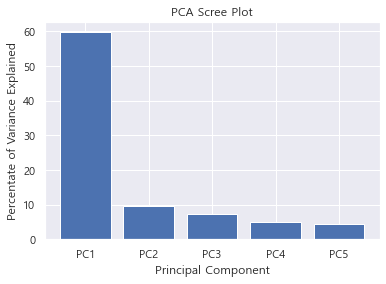

In [168]:
percent_variance = np.round(pca.explained_variance_ratio_[0:5]* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    
    columns.append(f'PC{i+1}')
    
    
ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [138]:
X_pp = pd.DataFrame(PC_score[:,:2], columns = ['PC1','PC2'], index = data.index)
X_pp

,PC1,PC2
0,-0.817603,0.157478
1,-0.823285,0.100663
2,-1.663731,-0.279715
3,-1.670829,-0.303163
4,-1.009850,-1.668043
...,...,...
9049,-1.496649,0.483869
9050,-1.431805,0.597704
9051,-1.461569,0.557127
9052,-1.508593,0.403088


In [139]:
pca.components_

array([[ 0.27299563,  0.20887653,  0.10705752,  0.29745676,  0.26387768,
         0.31498416,  0.29275822,  0.32645684,  0.30116059,  0.19426997,
         0.26970477,  0.27470086, -0.20678911,  0.31808704, -0.01390704],
       [ 0.00735561, -0.49642488,  0.29061786,  0.14842947, -0.38508452,
         0.14722856, -0.03302859, -0.16516409, -0.18379532,  0.43275661,
         0.33845526,  0.27489907, -0.04575791, -0.18806187, -0.00634626],
       [-0.29832444,  0.35175063,  0.68664022, -0.06597488,  0.29705595,
        -0.08928368, -0.21513417, -0.03979207, -0.08844751,  0.10383065,
         0.07118471,  0.1283582 ,  0.35611185,  0.01753083,  0.00983811],
       [-0.27628958,  0.14526682, -0.6398846 ,  0.13640778,  0.1722805 ,
         0.0674246 , -0.16642305, -0.05743184, -0.03416544,  0.36491705,
         0.25387006,  0.16138074,  0.4278835 , -0.03442181,  0.01363493],
       [-0.28290786,  0.26227281, -0.06961013, -0.04914297,  0.11302692,
        -0.0908559 , -0.20136386,  0.02866164, 

In [140]:
pca.explained_variance_

array([8.40904421, 1.36140889, 1.02762819, 0.7197712 , 0.63472534,
       0.51045288, 0.36336819, 0.27193771, 0.21008113, 0.14101268,
       0.12953995, 0.10221987, 0.07907626, 0.07569977, 0.04477369])

In [141]:
ratio = pca.explained_variance_ratio_
ratio

array([0.59720187, 0.09668589, 0.07298112, 0.05111743, 0.04507756,
       0.03625185, 0.02580604, 0.01931274, 0.01491975, 0.01001458,
       0.0091998 , 0.00725955, 0.00561592, 0.00537612, 0.00317978])

,V_ration
PC1,0.597202
PC2,0.096686
PC3,0.072981
PC4,0.051117
PC5,0.045078


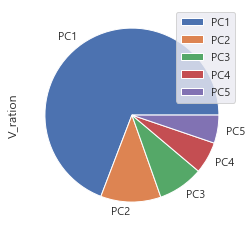

In [148]:
df_v = pd.DataFrame(ratio[:5], index=['PC1','PC2','PC3','PC4','PC5'], columns=['V_ration'])
df_v.plot.pie(y='V_ration')
df_v

In [143]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(data.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,8.409044,0.597202,0.597202
pca2,1.361409,0.096686,0.693888
pca3,1.027628,0.072981,0.766869
pca4,0.719771,0.051117,0.817986
pca5,0.634725,0.045078,0.863064
pca6,0.510453,0.036252,0.899316
pca7,0.363368,0.025806,0.925122
pca8,0.271938,0.019313,0.944435
pca9,0.210081,0.014920,0.959354
pca10,0.141013,0.010015,0.969369


In [144]:
PCs = PC_score[:,:2]
PCs

array([[-0.81760348,  0.15747762],
       [-0.82328504,  0.10066296],
       [-1.66373052, -0.27971494],
       ...,
       [-1.46156895,  0.55712701],
       [-1.508593  ,  0.40308783],
       [-1.49411079,  0.39910386]])

In [87]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df,df['smart_label'], test_size=0.2, random_state=42, \
                                                    stratify=df2['smart_label'])

x_train=x_train.drop(['index_부산 보행등','smart_label','label'],axis=1)
x_test=x_test.drop(['index_부산 보행등','smart_label','label'],axis=1)

In [98]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(numpy_test, y)
some_predicted2 = model2.predict(numpy_test)
print(model2.score(numpy_test, y))

0.7447537000220897


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
confusion_matrix(y,some_predicted2)

array([[3519, 1362],
       [ 949, 3224]], dtype=int64)

In [101]:
model22 = LogisticRegression()
model22.fit(PCs,y)
some_predicted22 = model22.predict(PCs)
confusion_matrix(y,some_predicted22)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[3548, 1333],
       [1941, 2232]], dtype=int64)

In [89]:
#의사결정트리
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
some_predicted3 = model3.predict(x_test)
mse3 = np.sqrt(mean_squared_error(some_predicted3, y_test))
print('평균제곱근오차', mse3)

평균제곱근오차 0.30275743617188267


In [93]:
accuracy_score(y_test, some_predicted3)

0.9083379348426284

In [90]:
#SVM
from sklearn import svm
model4 = svm.SVC()
model4.fit(x_train, y_train)
some_predicted4=model4.predict(x_test)
accuracy_score(y_test, some_predicted4)

0.6537824406405301

In [91]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
model5 = RandomForestClassifier()
model5.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
some_predicted5 = model5.predict(x_test)
mse5= np.sqrt(mean_squared_error(some_predicted5,y_test))
print('평균제곱근오차', mse5)

평균제곱근오차 0.21017728048594655


In [92]:
print(model5.score(x_train, y_train))

1.0


In [ ]:
dfs=pd.read_csv('서울_정답포함.csv', encoding='euckr')
dfs.head()

In [ ]:
dfs.columns

In [ ]:
dfs2=dfs[]
y=dfs2[['label']]
y

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler=['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터', '지하철', '터미널', '편의점', '약국', '병원','관할구별 시각장애인 수']
rbs = RobustScaler()
dfs[scaler]=rbs.fit_transform(dfs[scaler])

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [15] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


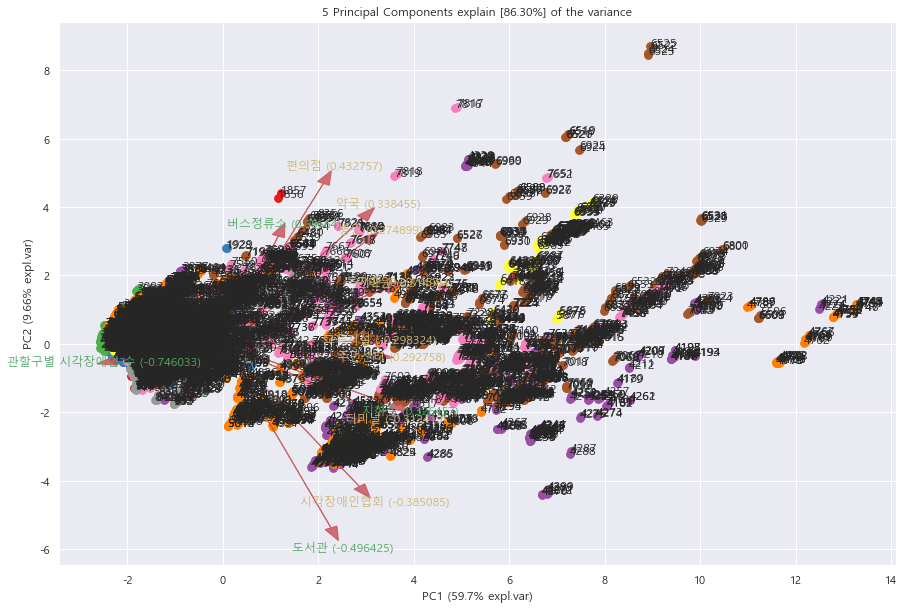

In [149]:
from pca import pca

model = pca(n_components=5)
results = model.fit_transform(data)
fig, ax = model.biplot(n_feat=13, legend=False)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [15] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


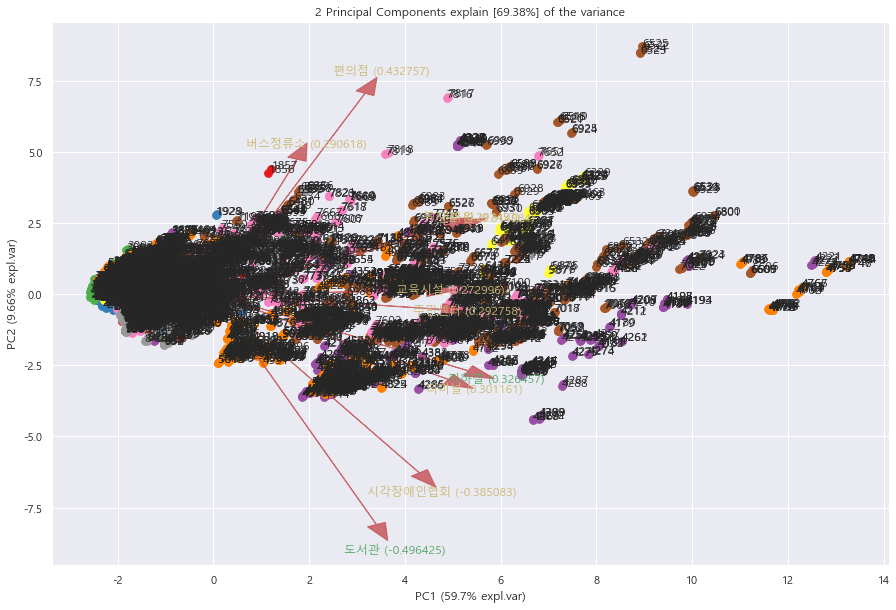

In [147]:
from pca import pca

model = pca(n_components=2)
results = model.fit_transform(data)
fig, ax = model.biplot(n_feat=10, legend=False)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [15] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


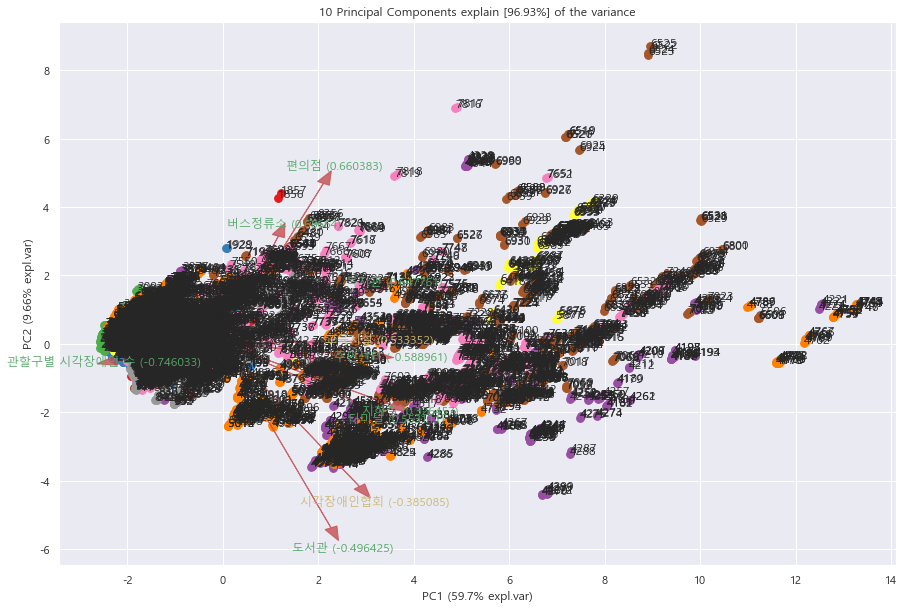

In [146]:
from pca import pca

model = pca(n_components=10)
results = model.fit_transform(data)
fig, ax = model.biplot(n_feat=10, legend=False)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [15] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


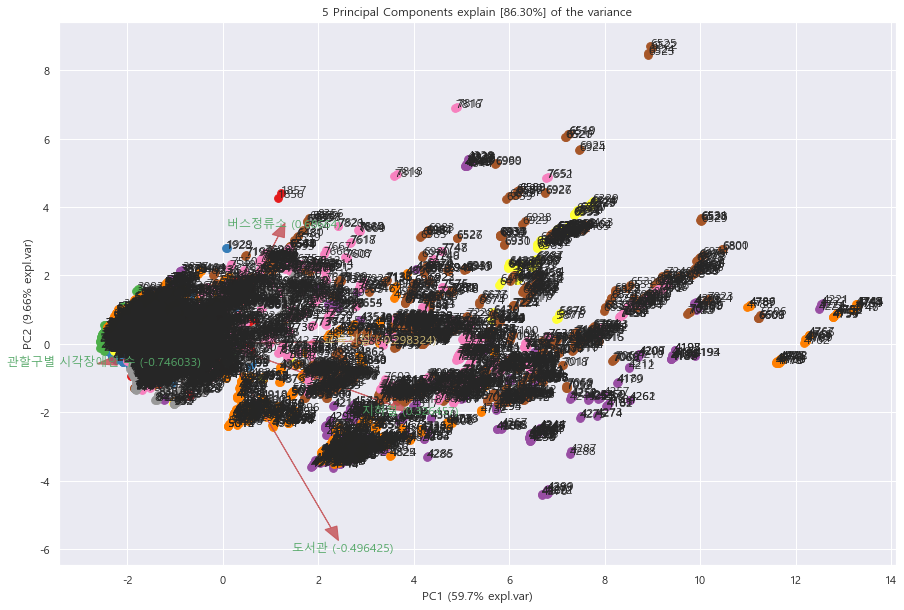

In [145]:
from pca import pca

model = pca(n_components=2)
results = model.fit_transform(data)
fig, ax = model.biplot(n_feat=5, legend=False)

In [16]:
from sklearn.linear_model import LogisticRegression      ## 로지스틱 회귀분석
from sklearn.naive_bayes import GaussianNB               ## 나이브 베이즈
from sklearn import svm                                  ## 서포트 벡터 머신
from sklearn import tree                                 ## 의사결정나무
from sklearn.ensemble import RandomForestClassifier      ##랜덤포레스트

In [ ]:
print(model5.score(x_train, y_train))

In [19]:
clf = LogisticRegression(max_iter=1000, random_state=0, 
                        multi_class='multinomial')
clf.fit(numpy_test,y)
pred = clf.predict(numpy_test)
confusion_matrix(y,pred)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[3176, 1705],
       [ 715, 3458]], dtype=int64)

In [20]:
clf.score(numpy_test,y)

0.7327148221780428

In [21]:
clf.fit(PC_score,y)
pred = clf.predict(PC_score)
confusion_matrix(y,pred)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[3174, 1707],
       [ 715, 3458]], dtype=int64)

In [22]:
clf.score(numpy_test,y)

0.35255135851557323

In [ ]:
dfs=pd.read_csv('서울_정답포함.csv', encoding='euckr')
dfs.head()

In [ ]:
dfs.columns

In [ ]:
dfs2=dfs
y=dfs2[['label']]
y

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler=['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터', '지하철', '터미널', '편의점', '약국', '병원','관할구별 시각장애인 수']
rbs = RobustScaler()
dfs[scaler]=rbs.fit_transform(dfs[scaler])

In [ ]:
dfs=dfs.drop(['신호등_index','label'],axis=1)

In [ ]:
clf.predict(dfs)
clf.score(dfs,y)

In [ ]:
gnb.predict(dfs)
gnb.score(dfs, y)

In [ ]:
clf2.predict(dfs)
clf2.score(dfs,y)

In [ ]:
clf3.predict(dfs)
clf3.score(dfs,y)

In [ ]:
clf4.predict(dfs)
clf4.score(dfs,y)

In [ ]:
##PCA 비교

In [30]:
df2=pd.read_csv('부산데이터셋.csv', encoding='euckr')
df2

,index_부산 보행등,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,...,버스정류소1,복지관1,시각장애인협회1,안마원1,주민센터1,지하철역1,터미널1,편의점1,약국1,병원1
0,1,2417.879656,12705.060760,141.605483,1037.862825,12413.490090,1701.868620,1022.863654,314.344945,4231.693661,...,80,0,0,0,1,6,0,4,6,10
1,2,2435.553629,12720.660220,126.183552,1051.315521,12433.327920,1713.321603,1042.188031,306.005236,4246.960340,...,81,0,0,0,1,6,0,4,6,9
2,3,6444.897700,14024.588570,75.101932,1137.888200,9737.092056,777.585976,211.149550,499.571548,1680.802262,...,45,0,0,1,1,14,0,26,13,66
3,4,6458.035113,14035.173160,68.832494,1127.685462,9741.790396,787.771837,199.002832,490.075206,1673.688035,...,44,0,0,1,1,14,0,26,13,64
4,5,5933.995947,16237.446680,36.608591,39.897317,15465.223390,186.414343,383.085229,355.408493,7248.261659,...,49,5,0,3,3,8,0,19,20,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,9050,13164.708470,9764.163274,59.501073,1150.794805,2943.170470,631.621888,284.405242,250.403414,711.740290,...,96,0,0,4,7,31,1,51,33,143
9050,9051,13136.090140,9782.988604,82.203006,1146.496242,2923.297271,629.519271,310.892781,301.131537,685.109598,...,95,0,0,4,7,29,1,50,35,145
9051,9052,13123.891020,9764.341811,65.867680,1129.115339,2908.745138,611.774408,292.922164,302.739372,672.012179,...,96,0,0,4,7,29,1,50,33,142
9052,9053,13335.198000,9818.774662,59.812683,1087.443708,3100.839539,765.410954,371.050538,77.510091,884.281205,...,109,0,0,4,8,33,1,52,41,173


In [31]:
df2['label'] = np.where(df2['label'] - df2['smart_label'] == 1, 1, 0)

print(df2['label'].value_counts())
print(df2['smart_label'].value_counts())

0    8269
1     785
Name: label, dtype: int64
0    5666
1    3388
Name: smart_label, dtype: int64


In [32]:
df2.columns

Index(['index_부산 보행등', '교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터',
       '지하철', '터미널', '편의점', '약국', '병원', '관할구별 시각장애인 수', '교통사고', 'label',
       'smart_label', '교육시설50', '도서관50', '버스정류소50', '복지관50', '시각장애인협회50',
       '안마원50', '주민센터50', '지하철역50', '터미널50', '편의점50', '약국50', '병원50', '교육시설1',
       '도서관1', '버스정류소1', '복지관1', '시각장애인협회1', '안마원1', '주민센터1', '지하철역1', '터미널1',
       '편의점1', '약국1', '병원1'],
      dtype='object')

In [33]:
scaler=['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터','지하철', '터미널', '편의점', '약국', '병원','교통사고']
df2[scaler] = np.log(df2[scaler])
df2

,index_부산 보행등,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,...,버스정류소1,복지관1,시각장애인협회1,안마원1,주민센터1,지하철역1,터미널1,편의점1,약국1,병원1
0,1,7.790646,9.449756,4.953045,6.944919,9.426539,7.439482,6.930361,5.750491,8.350358,...,80,0,0,0,1,6,0,4,6,10
1,2,7.797929,9.450983,4.837738,6.957798,9.428136,7.446189,6.949078,5.723602,8.353959,...,81,0,0,0,1,6,0,4,6,9
2,3,8.771044,9.548567,4.318846,7.036929,9.183698,6.656194,5.352567,6.213751,7.427026,...,45,0,0,1,1,14,0,26,13,66
3,4,8.773080,9.549322,4.231676,7.027923,9.184180,6.669209,5.293319,6.194559,7.422785,...,44,0,0,1,1,14,0,26,13,64
4,5,8.688453,9.695075,3.600283,3.686309,9.646349,5.227972,5.948257,5.873268,8.888517,...,49,5,0,3,3,8,0,19,20,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,9050,9.485295,9.186474,4.085994,7.048208,7.987243,6.448291,5.650400,5.523073,6.567713,...,96,0,0,4,7,31,1,51,33,143
9050,9051,9.483119,9.188400,4.409192,7.044466,7.980467,6.444956,5.739448,5.707547,6.529579,...,95,0,0,4,7,29,1,50,35,145
9051,9052,9.482190,9.186492,4.187648,7.029190,7.975477,6.416364,5.679907,5.712872,6.510276,...,96,0,0,4,7,29,1,50,33,142
9052,9053,9.498162,9.192052,4.091218,6.991585,8.039428,6.640413,5.916338,4.350408,6.784775,...,109,0,0,4,8,33,1,52,41,173


In [34]:
from sklearn.preprocessing import RobustScaler

scaler=['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터', '지하철', '터미널', '편의점', '약국', '병원','관할구별 시각장애인 수','교통사고']
rbs = RobustScaler()
data[scaler]=rbs.fit_transform(data[scaler])

C:\Users\user\AppData\Local\Temp\ipykernel_2492\3177063250.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[scaler]=rbs.fit_transform(data[scaler])


In [35]:
target=df[['smart_label']]
target

,smart_label
0,1
1,1
2,1
3,1
4,1
...,...
9049,0
9050,0
9051,0
9052,1


In [36]:
data=df[['교육시설', '도서관', '버스정류소', '복지관', '시각장애인협회', '안마원', '주민센터', '지하철', '터미널', '편의점', '약국', '병원', '관할구별 시각장애인 수', '교통사고', '교육시설50', '도서관50', '버스정류소50', '복지관50', '시각장애인협회50','안마원50', '주민센터50', '지하철역50', '터미널50', '편의점50', '약국50', '병원50', '교육시설1','도서관1', '버스정류소1', '복지관1', '시각장애인협회1', '안마원1', '주민센터1', '지하철역1', '터미널1','편의점1', '약국1', '병원1','label']]
data

,교육시설,도서관,버스정류소,복지관,시각장애인협회,안마원,주민센터,지하철,터미널,편의점,...,복지관1,시각장애인협회1,안마원1,주민센터1,지하철역1,터미널1,편의점1,약국1,병원1,label
0,7.790646,9.449756,4.953045,6.944919,9.426539,7.439482,6.930361,5.750491,8.350358,4.979799,...,0,0,0,1,6,0,4,6,10,1
1,7.797929,9.450983,4.837738,6.957798,9.428136,7.446189,6.949078,5.723602,8.353959,4.892167,...,0,0,0,1,6,0,4,6,9,1
2,8.771044,9.548567,4.318846,7.036929,9.183698,6.656194,5.352567,6.213751,7.427026,5.655981,...,0,0,1,1,14,0,26,13,66,1
3,8.773080,9.549322,4.231676,7.027923,9.184180,6.669209,5.293319,6.194559,7.422785,5.614441,...,0,0,1,1,14,0,26,13,64,1
4,8.688453,9.695075,3.600283,3.686309,9.646349,5.227972,5.948257,5.873268,8.888517,5.014876,...,5,0,3,3,8,0,19,20,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,9.485295,9.186474,4.085994,7.048208,7.987243,6.448291,5.650400,5.523073,6.567713,4.452902,...,0,0,4,7,31,1,51,33,143,1
9050,9.483119,9.188400,4.409192,7.044466,7.980467,6.444956,5.739448,5.707547,6.529579,4.746122,...,0,0,4,7,29,1,50,35,145,1
9051,9.482190,9.186492,4.187648,7.029190,7.975477,6.416364,5.679907,5.712872,6.510276,4.826794,...,0,0,4,7,29,1,50,33,142,1
9052,9.498162,9.192052,4.091218,6.991585,8.039428,6.640413,5.916338,4.350408,6.784775,3.640682,...,0,0,4,8,33,1,52,41,173,1


In [37]:
x = np.array(data)

In [38]:
y=np.array(target)

In [39]:
feature_names = data.columns

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

# 모델 생성 / 최대 iter 2000 / 다중 분류이므로 multi_class 적용
clf = LogisticRegression(max_iter=2000, random_state=0,
                        multi_class='multinomial', 
                        solver='sag')
clf.fit(x_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=2000, multi_class='multinomial', random_state=0,
                   solver='sag')

In [50]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(max_iter=2000, multi_class='multinomial', random_state=0,
                   solver='sag')

In [51]:
pred = clf.predict(x_test)
print(accuracy_score(y_test, pred))

0.906129210381005


In [53]:
pca = PCA()
pca.fit(x)

PCA()

In [54]:
pcscore = pca.transform(x)

In [55]:
pca.explained_variance_

array([2.30410509e+05, 5.87473606e+03, 7.98297843e+02, 7.58351884e+01,
       6.28629040e+01, 4.54371330e+01, 2.91407940e+01, 6.04581582e+00,
       2.24931650e+00, 2.15009821e+00, 1.94584381e+00, 1.43481264e+00,
       1.33313728e+00, 1.06313134e+00, 8.35245097e-01, 6.21090312e-01,
       5.92976376e-01, 4.66274488e-01, 4.21232446e-01, 3.86101311e-01,
       3.44479990e-01, 3.31921921e-01, 3.02311252e-01, 2.75536428e-01,
       2.13778143e-01, 1.77183450e-01, 1.67871872e-01, 1.31263473e-01,
       4.62832448e-02, 3.74015603e-02, 3.49779653e-02, 2.84512165e-02,
       8.65525282e-03, 6.44945996e-03, 5.30289942e-03, 1.42485869e-03,
       6.43356054e-04, 2.15342361e-04, 1.08761329e-04])

<AxesSubplot:>

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

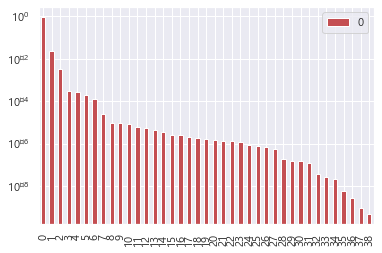

In [57]:
PC_ratio = pca.explained_variance_ratio_
PC_ratio_df = pd.DataFrame(PC_ratio)
PC_ratio_df.plot(kind='bar', logy=True, color='r')

In [58]:
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
cf1 = confusion_matrix(y_test, pred)
print(cf1)
print(accuracy_score(y_test, pred))

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[971 144]
 [ 26 670]]
0.906129210381005


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [59]:
clf2.fit(train_score, y_train)
pred2 = clf2.predict(test_score)
cf2 = confusion_matrix(y_test, pred2)
print(cf2)
print(accuracy_score(y_test, pred2))

NameError: name 'clf2' is not defined